loading the dataset 

 info of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Mean: 357.77574911261877
Median: 11.0
Mode: 0.0


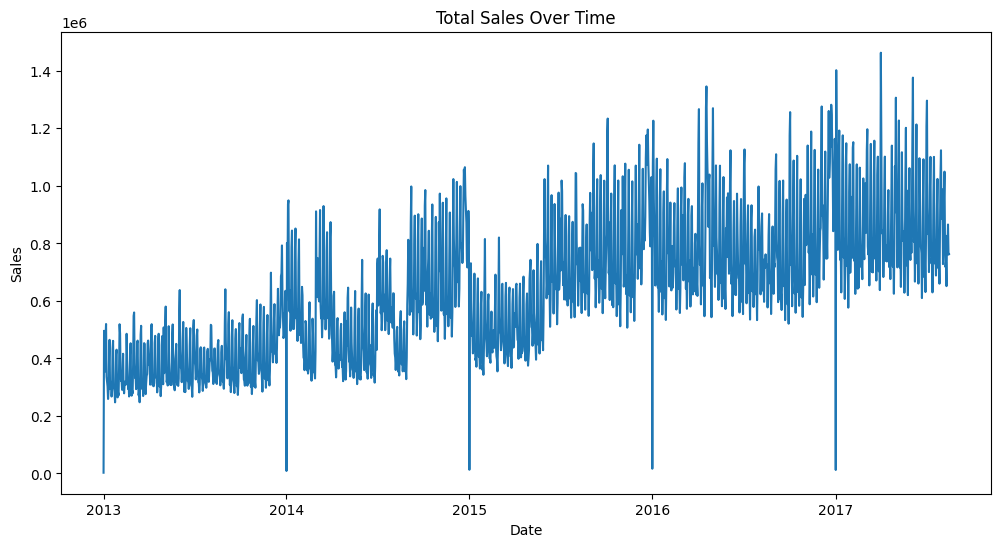

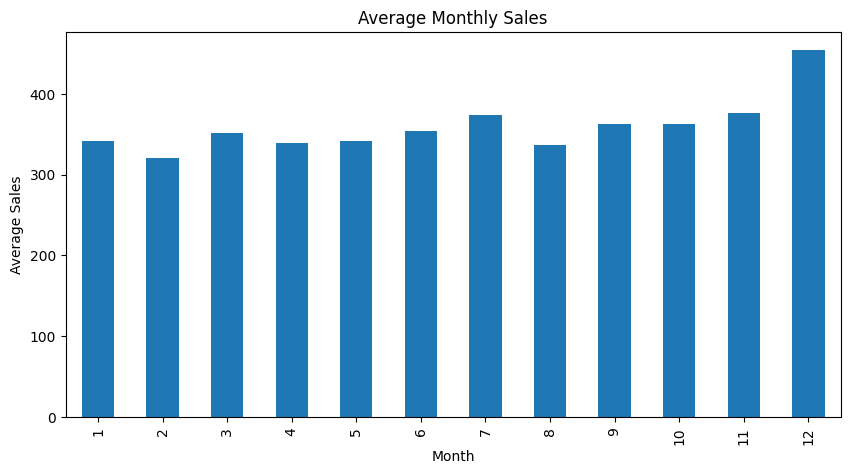

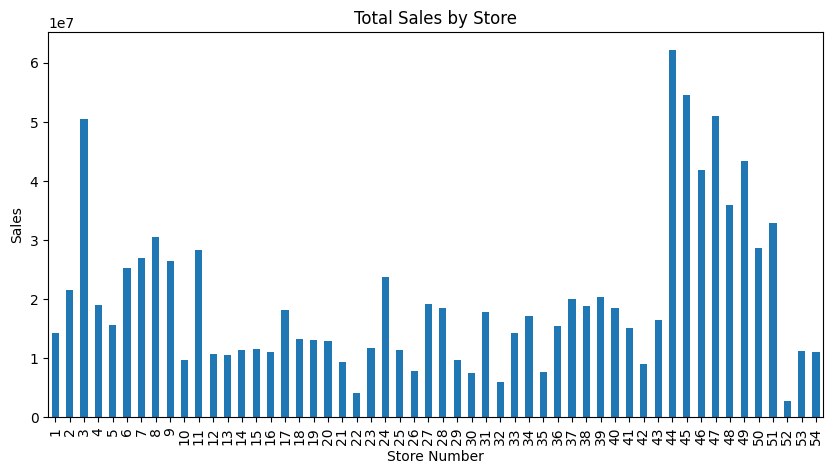

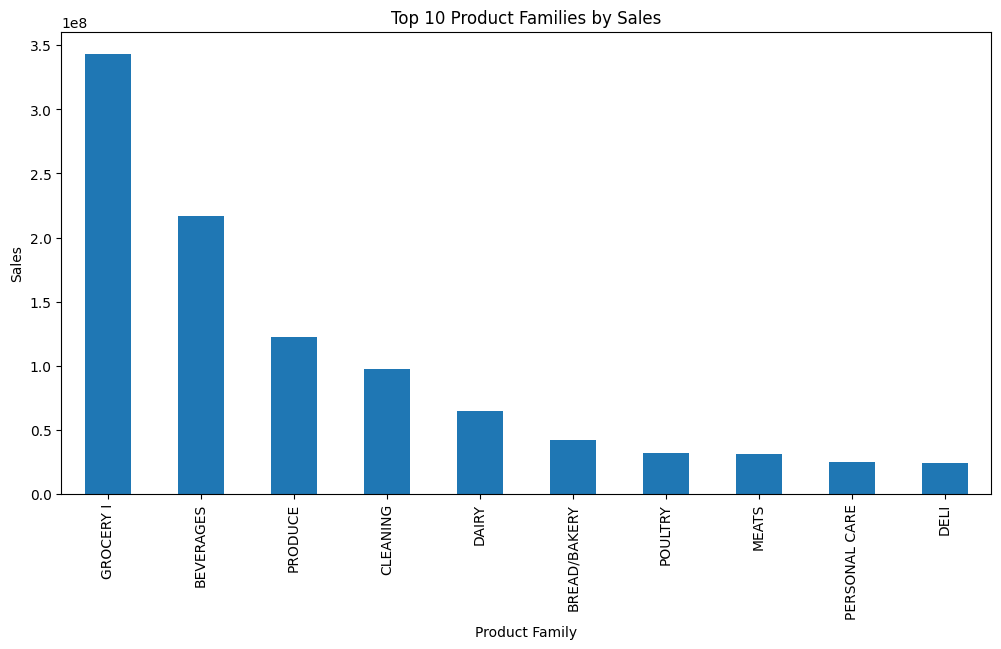

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('loading the dataset ')
df = pd.read_csv("train.csv")

df.head()

df.shape

print('\n info of the data')
df.info()


df.columns

df['date'] = pd.to_datetime(df['date'])

print(df.isnull().sum())


df.duplicated().sum()
df = df.drop_duplicates()
df['sales'].describe()


mean_sales = df['sales'].mean()
median_sales = df['sales'].median()
mode_sales = df['sales'].mode()[0]

print("\nMean:", mean_sales)
print("Median:", median_sales)
print("Mode:", mode_sales)


daily_sales = df.groupby('date')['sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(daily_sales)
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


monthly_sales = df.groupby('month')['sales'].mean()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


store_sales = df.groupby('store_nbr')['sales'].sum()

plt.figure(figsize=(10,5))
store_sales.plot(kind='bar')
plt.title("Total Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Sales")
plt.show()


family_sales = df.groupby('family')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
family_sales.head(10).plot(kind='bar')
plt.title("Top 10 Product Families by Sales")
plt.xlabel("Product Family")
plt.ylabel("Sales")
plt.show()

summary_df = pd.DataFrame({
    "Metric": ["Mean Sales", "Median Sales", "Mode Sales"],
    "Value": [mean_sales, median_sales, mode_sales]
})

with pd.ExcelWriter("EDA_Sales_Output.xlsx", engine="openpyxl") as writer:
    summary_df.to_excel(writer, sheet_name="Summary_Stats", index=False)
    monthly_sales.to_excel(writer, sheet_name="Monthly_Sales")
